# Income Prediction Using Adult Census Data

The dataset is of a census conducted on adult citizens. Data Exploration is performed to understand the features better and the prediction task is to determine whether an individual's income is above 50k or no by using the relevant features.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('adult.csv')
data.head() #gives first 5 rows in the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.shape # gives no. of rows and columns

(32561, 15)

In [4]:
data.info() # gives info of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
data.describe(include=["O"]) #describes attributes having string data

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### DATA CLEANING & EXPLORATION

WORKING WITH EACH ATTRIBUTE

##### For target attribute 'income'

In [7]:
print(f"Target: 'Income'\nUnique Values in Income: {data.income.unique()}\nNumber of unique values: {data.income.nunique()}")

Target: 'Income'
Unique Values in Income: ['<=50K' '>50K']
Number of unique values: 2


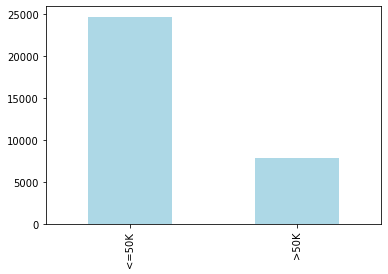

In [8]:
# Visualizing the target variable for checking whether the dataset is imbalanced or not
data.income.value_counts().plot(kind='bar', color='lightblue')
plt.show()

In the problem, 'Income' is the Target variable. The prediction we perform will be in terms of only two values, which are either the income is greater than 50K > "1", or the income is less than or equal to 50K > "0". So we will label encode the target variable.

In [9]:
data['income'] = data['income'].str.replace('>50K', '1')
data['income'] = data['income'].str.replace('<=50K', '0')
data['income'] = data['income'].astype(np.int64)

In [10]:
df=data.copy()

##### For Education and Education.num attributes

In [11]:
print(f"Unique values in 'Education': {df.education.nunique()}\nUnique values in 'Education_num': {df['education.num'].nunique()}")

Unique values in 'Education': 16
Unique values in 'Education_num': 16


The values in 'Education' are already encoded in 'Education_num'. Thus, we drop the feature 'Education'.

In [12]:
df.drop(['education'], axis = 1, inplace = True)

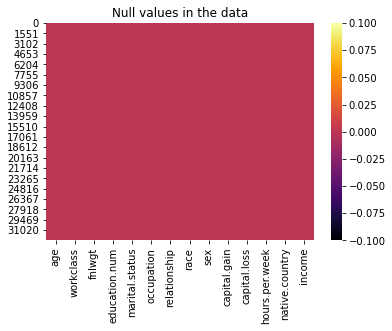

In [13]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(df.isnull(), cmap = 'inferno')
plt.show()

##### For Workclass attribute

In [14]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Since enteries for people 'Without-pay' and 'Never-worked' workclass are very less we will combine them as one value naming it altogether as 'Without-pay'.

In [15]:
df['workclass'] = df['workclass'].str.replace('Never-worked', 'Without-pay')

In [16]:
# Replacing '?' values in workclass with NaN 
df['workclass'] = df['workclass'].replace('?', np.NaN)

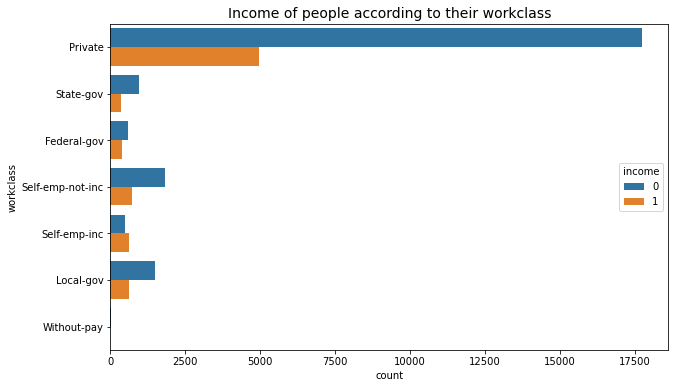

In [17]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 14)
sns.countplot(y = df['workclass'], hue = df['income'])
plt.show()

> Majority of people working in Private sector have income > 50K a year. Same goes for people with income < 50K. For the Self Employed sector, the number of people whose income > 50K are more than the number of people whose income < 50K. 

Now, we will replace the NaN values in the 'Workclass' feature by the mode of the column, grouping it by the 'Occupation' feature. 
We have 7 unique values in Workclass feature. We can encode these values using the frequency encoding technique. 

In [18]:
from scipy.stats import mode
# the pivot table shows the workclass category for each unique occupation
workclass_mode = df.pivot_table(values='workclass', columns='occupation',aggfunc=(lambda x:mode(x).mode[0]))
workclass_mode

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,Without-pay,Private,Federal-gov,Private,Private,Private,Private,Private,Private,Private,Private,Local-gov,Private,Private,Private


In [19]:
loc1 = df['workclass'].isnull() 
# where isnull=True changes '?' -> 'Without-pay' in workclass
df.loc[loc1, 'workclass'] = df.loc[loc1,'occupation'].apply(lambda x: workclass_mode[x]) 

In [20]:
# encoding the unique values in workclass 
workclass_enc = (df.groupby('workclass').size()) / len(df)
print(workclass_enc)

workclass
Federal-gov         0.029483
Local-gov           0.064279
Private             0.697030
Self-emp-inc        0.034274
Self-emp-not-inc    0.078038
State-gov           0.039864
Without-pay         0.057031
dtype: float64


In [21]:
df['workclass_enc'] = df['workclass'].apply(lambda x : workclass_enc[x])
df['workclass_enc'].head() # the new encoded values for workclass

0    0.057031
1    0.697030
2    0.057031
3    0.697030
4    0.697030
Name: workclass_enc, dtype: float64

In [22]:
df.drop(['workclass'], axis = 1, inplace = True) # dropping the initial workclass column

##### For occupation attribute

In [23]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df['occupation'] = df['occupation'].replace('?', np.NaN)
# dropping the rows where the occupation is NaN
df = df.loc[df['occupation'].isnull() == False]
df

,age,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,workclass_enc
1,82,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,0.69703
3,54,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0.69703
4,41,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0.69703
5,34,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0,0.69703
6,38,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0,0.69703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0,0.69703
32557,27,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.69703
32558,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.69703
32559,58,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.69703


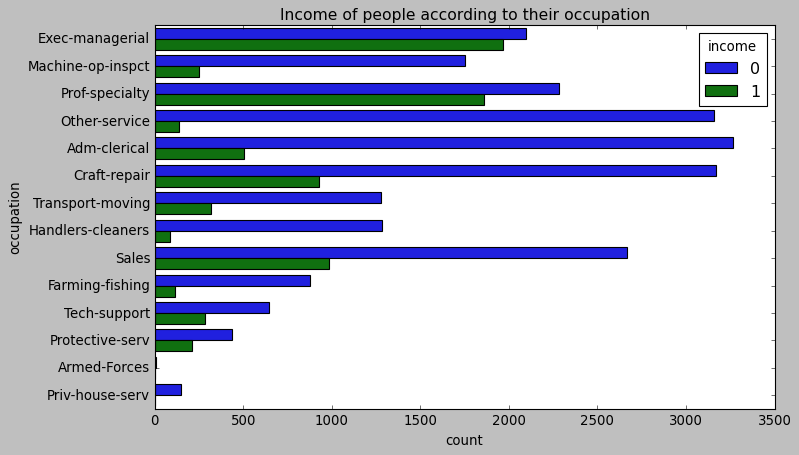

In [25]:
plt.style.use('classic')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 14)
sns.countplot(y = df['occupation'], hue = df['income'])
plt.show()

> We observe majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality. 

In [26]:
# encoding the unique values in occupation
occupation_enc = (df.groupby('occupation').size()) / len(df)
print(occupation_enc)

occupation
Adm-clerical         0.122729
Armed-Forces         0.000293
Craft-repair         0.133440
Exec-managerial      0.132365
Farming-fishing      0.032359
Handlers-cleaners    0.044599
Machine-op-inspct    0.065174
Other-service        0.107266
Priv-house-serv      0.004851
Prof-specialty       0.134774
Protective-serv      0.021128
Sales                0.118823
Tech-support         0.030210
Transport-moving     0.051989
dtype: float64


In [27]:
df['occupation_enc'] = df['occupation'].apply(lambda x : occupation_enc[x])
df['occupation_enc'].head() # the new encoded values for occupation

1    0.132365
3    0.065174
4    0.134774
5    0.107266
6    0.122729
Name: occupation_enc, dtype: float64

In [28]:
df.drop(['occupation'], axis = 1, inplace = True) # dropping the initial occupation column

##### For Native_country attribute

Checking whether for individuals native to the USA and those are not natives there. Converting all the values where country is not USA to 'non-usa'. We can encode the values by one-hot encoding without increasing the dimensionality of dataset.

In [29]:
df['native.country'].loc[df['native.country'] == 'United-States'] = 'usa'
df['native.country'].loc[df['native.country'] != 'usa'] = 'non_usa'
df['native.country'].value_counts()

usa        27504
non_usa     3214
Name: native.country, dtype: int64

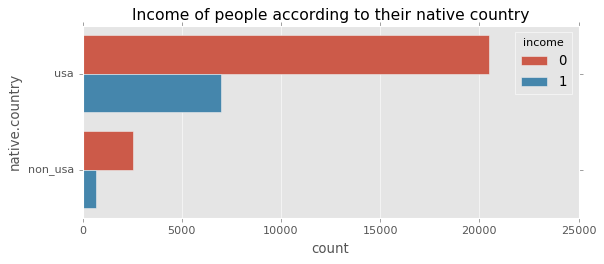

In [30]:
plt.style.use('ggplot')
plt.figure(figsize = (8,3))
plt.title("Income of people according to their native country", fontsize = 14)
sns.countplot(y = df['native.country'], hue = df['income'])
plt.show()

> We observe majority of people with higher income belong to the USA. 

In [31]:
# Using one hot encoding changing 'usa':1 and 'non-usa':0
df['country_enc'] = df['native.country'].map({'usa' : 1, 'non_usa' : 0})
df.drop(['native.country'], axis = 1, inplace = True) # dropping the initial native_country column

##### For sex attribute

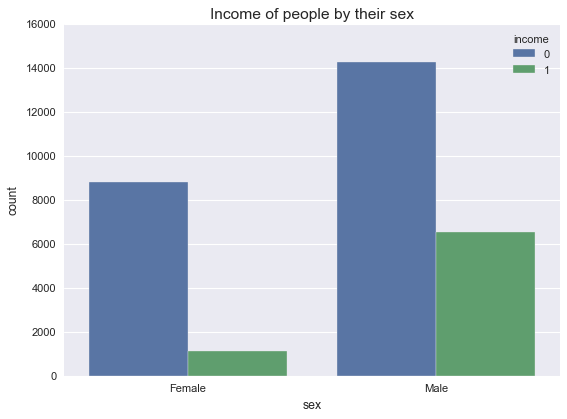

In [32]:
plt.style.use('seaborn')
plt.title("Income of people by their sex", fontsize = 14)
sns.countplot(x = df['sex'], hue = df['income'])
plt.show()

In [33]:
# Using one hot encoding. Changing 'male':1 and 'female':0
df['sex_enc'] = df['sex'].map({'Male' : 1, 'Female' : 0})
df.drop(['sex'], axis = 1, inplace = True) # dropping the initial sex column

##### For marital_status attribute

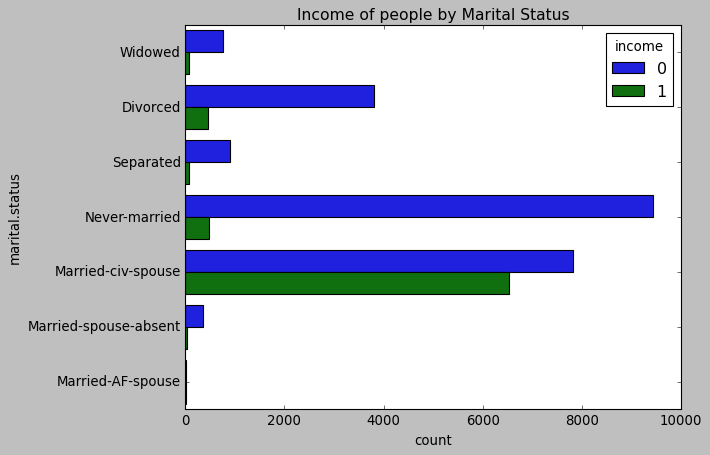

In [34]:
plt.style.use('classic')
plt.title("Income of people by Marital Status", fontsize = 14)
sns.countplot(y = df['marital.status'], hue = df['income'])
plt.show()

> We observe married people have a higher income as compared to others.

In [35]:
# encoding the unique values in occupation
marital_status_enc = (df.groupby('marital.status').size()) / len(df)
print(marital_status_enc)

marital.status
Divorced                 0.138616
Married-AF-spouse        0.000684
Married-civ-spouse       0.466795
Married-spouse-absent    0.012664
Never-married            0.322677
Separated                0.031219
Widowed                  0.027346
dtype: float64


In [36]:
df['marital_status_enc'] = df['marital.status'].apply(lambda x : marital_status_enc[x])
df['marital_status_enc'].head() # the new encoded values for occupation

1    0.027346
3    0.138616
4    0.031219
5    0.138616
6    0.031219
Name: marital_status_enc, dtype: float64

In [37]:
df.drop(['marital.status'], axis = 1, inplace = True) # dropping the initial marital.status column

##### For Race attribute

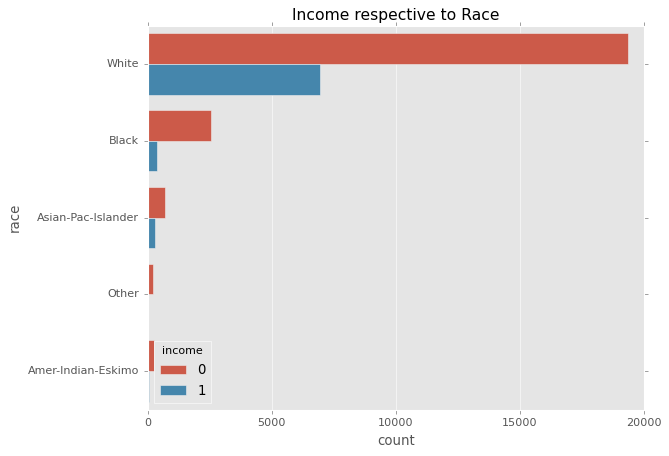

In [38]:
plt.style.use('ggplot')
plt.title("Income respective to Race", fontsize = 14)
sns.countplot(y = df['race'], hue = df['income'])
plt.show()

##### For relationship attribute

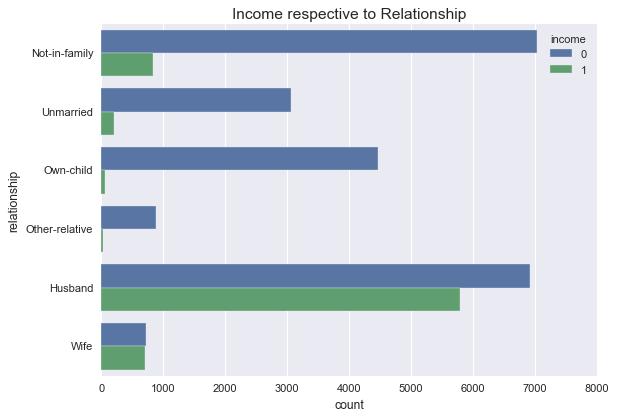

In [39]:
plt.style.use('seaborn')
plt.title("Income respective to Relationship", fontsize = 14)
sns.countplot(y = df['relationship'], hue = df['income'])
plt.show()

> White people have a higher salary as compared to other races. Similarly, husband in the family have a higher salary as compared to other relationship in the family. Encoding both these columns using onehot encoding.

In [40]:
# encoding the unique values in race
race_enc = (df.groupby('race').size()) / len(df)
print(race_enc,'\n')
df['race_enc'] = df['race'].apply(lambda x : race_enc[x])
df.drop(['race'], axis = 1, inplace = True) # dropping the initial race column

race
Amer-Indian-Eskimo    0.009311
Asian-Pac-Islander    0.031708
Black                 0.094700
Other                 0.008073
White                 0.856208
dtype: float64 



In [41]:
# encoding the unique values in relationship
relationship_enc = (df.groupby('relationship').size()) / len(df)
print(relationship_enc)
df['relationship_enc'] = df['relationship'].apply(lambda x : relationship_enc[x])
df.drop(['relationship'], axis = 1, inplace = True) # dropping the initial relationship column

relationship
Husband           0.413569
Not-in-family     0.256039
Other-relative    0.029885
Own-child         0.147308
Unmarried         0.106485
Wife              0.046715
dtype: float64


In [42]:
new_df = df.drop(['income'], axis = 1)
new_df['income'] = df['income']
new_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_enc,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
1,82,132870,9,0,4356,18,0.69703,0.132365,1,0,0.027346,0.856208,0.256039,0
3,54,140359,4,0,3900,40,0.69703,0.065174,1,0,0.138616,0.856208,0.106485,0
4,41,264663,10,0,3900,40,0.69703,0.134774,1,0,0.031219,0.856208,0.147308,0
5,34,216864,9,0,3770,45,0.69703,0.107266,1,0,0.138616,0.856208,0.106485,0
6,38,150601,6,0,3770,40,0.69703,0.122729,1,1,0.031219,0.856208,0.106485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0.69703,0.021128,1,1,0.322677,0.856208,0.256039,0
32557,27,257302,12,0,0,38,0.69703,0.030210,1,0,0.466795,0.856208,0.046715,0
32558,40,154374,9,0,0,40,0.69703,0.065174,1,1,0.466795,0.856208,0.413569,1
32559,58,151910,9,0,0,40,0.69703,0.122729,1,0,0.027346,0.856208,0.106485,0


#### DETECTING OUTLIERS IN THE FEATURE VARIABLES

Now we check if any outliers are present in the continous attributes of the dataset. We do this both by visualisations and the z-score normalization for the continous columns.

BoxPlots of the features:


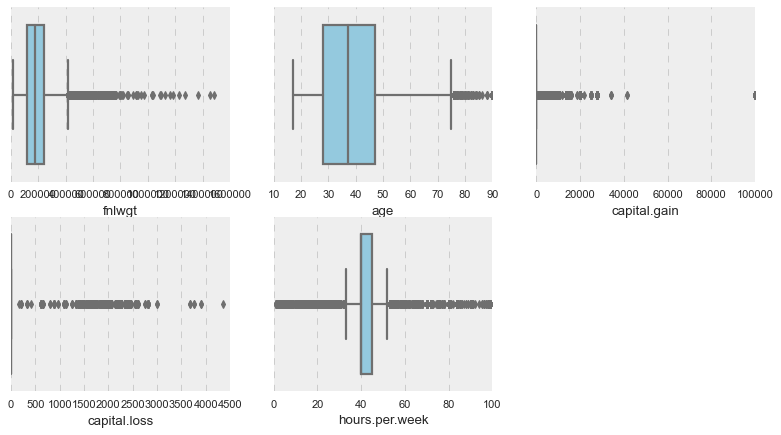

In [43]:
plt.style.use('bmh')
clist = ['fnlwgt','age','capital.gain','capital.loss','hours.per.week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(df[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

> Outliers are present in the many continous valued columns. Now we check the z-scores for these continous valued features.

In [44]:
from scipy.stats import zscore
z_abs = np.abs(zscore(new_df.loc[:,'fnlwgt':'hours.per.week']))
print(np.shape(np.where(z_abs >= 3)))
new_df = new_df[(z_abs < 3).all(axis = 1)]
new_df

(2, 2566)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_enc,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
1470,62,159908,13,0,1258,38,0.064279,0.122729,1,0,0.466795,0.856208,0.046715,0
1471,72,144515,16,0,1258,40,0.064279,0.132365,1,1,0.466795,0.856208,0.413569,0
1473,66,350498,10,0,1258,20,0.697030,0.051989,1,1,0.466795,0.856208,0.413569,0
1474,33,262042,9,0,1138,40,0.064279,0.122729,1,0,0.138616,0.856208,0.147308,0
1475,29,138190,9,0,1138,40,0.697030,0.118823,1,0,0.322677,0.094700,0.106485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0.697030,0.021128,1,1,0.322677,0.856208,0.256039,0
32557,27,257302,12,0,0,38,0.697030,0.030210,1,0,0.466795,0.856208,0.046715,0
32558,40,154374,9,0,0,40,0.697030,0.065174,1,1,0.466795,0.856208,0.413569,1
32559,58,151910,9,0,0,40,0.697030,0.122729,1,0,0.027346,0.856208,0.106485,0


We have a total of 2566 outliers in the data. After removing the outliers, now we have 28213 observations left in the dataframe.

Now, we check for the correlation between feature variables and target variables to check which feature is most related to the target variable.

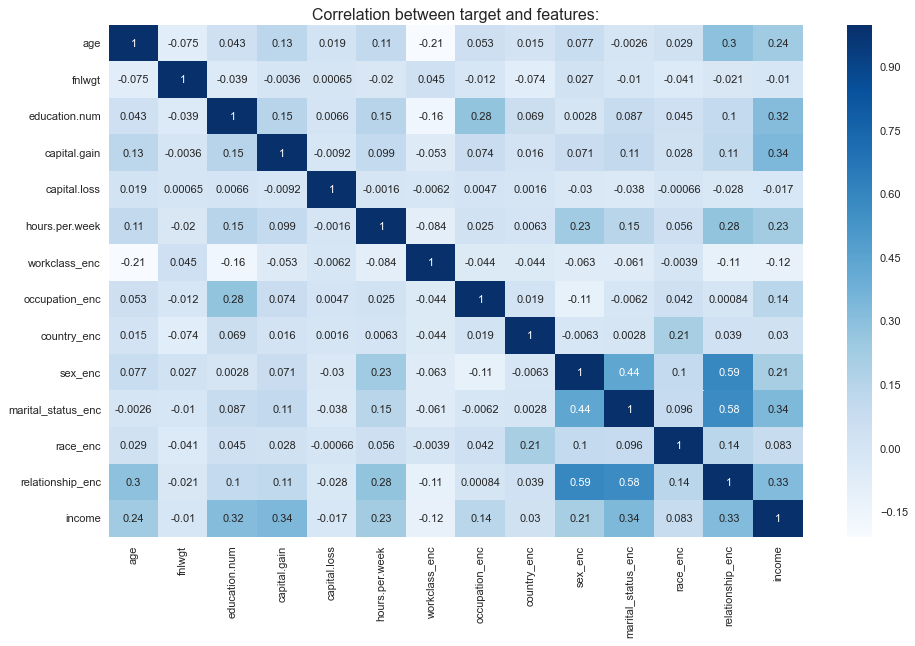

In [45]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(new_df.corr(), annot = True, cmap="Blues")
plt.show()

> 'Capital_gain', 'Education_num', 'Marital_status_enc', 'Relationship_enc' are most correlated to the Income of the observations.

### FEATURE SCALING

In [46]:
# to standardize the range of features of data with min-max normalization
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_df.loc[:,'age':'hours.per.week'] = scale.fit_transform(new_df.loc[:,'age':'hours.per.week'])
new_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_enc,occupation_enc,country_enc,sex_enc,marital_status_enc,race_enc,relationship_enc,income
1470,0.616438,0.296903,0.769231,0.0,1.00000,0.464789,0.064279,0.122729,1,0,0.466795,0.856208,0.046715,0
1471,0.753425,0.265630,1.000000,0.0,1.00000,0.492958,0.064279,0.132365,1,1,0.466795,0.856208,0.413569,0
1473,0.671233,0.684115,0.538462,0.0,1.00000,0.211268,0.697030,0.051989,1,1,0.466795,0.856208,0.413569,0
1474,0.219178,0.504404,0.461538,0.0,0.90461,0.492958,0.064279,0.122729,1,0,0.138616,0.856208,0.147308,0
1475,0.164384,0.252780,0.461538,0.0,0.90461,0.492958,0.697030,0.118823,1,0,0.322677,0.094700,0.106485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.602146,0.538462,0.0,0.00000,0.492958,0.697030,0.021128,1,1,0.322677,0.856208,0.256039,0
32557,0.136986,0.494774,0.692308,0.0,0.00000,0.464789,0.697030,0.030210,1,0,0.466795,0.856208,0.046715,0
32558,0.315068,0.285660,0.461538,0.0,0.00000,0.492958,0.697030,0.065174,1,1,0.466795,0.856208,0.413569,1
32559,0.561644,0.280654,0.461538,0.0,0.00000,0.492958,0.697030,0.122729,1,0,0.027346,0.856208,0.106485,0


### SPLITTING THE DATA

In [47]:
# make x (dataset of the features)
x=df.drop('income',axis=1).values 
x

array([[8.20000000e+01, 1.32870000e+05, 9.00000000e+00, ...,
        2.73455303e-02, 8.56208086e-01, 2.56038805e-01],
       [5.40000000e+01, 1.40359000e+05, 4.00000000e+00, ...,
        1.38615795e-01, 8.56208086e-01, 1.06484797e-01],
       [4.10000000e+01, 2.64663000e+05, 1.00000000e+01, ...,
        3.12194804e-02, 8.56208086e-01, 1.47307767e-01],
       ...,
       [4.00000000e+01, 1.54374000e+05, 9.00000000e+00, ...,
        4.66794713e-01, 8.56208086e-01, 4.13568592e-01],
       [5.80000000e+01, 1.51910000e+05, 9.00000000e+00, ...,
        2.73455303e-02, 8.56208086e-01, 1.06484797e-01],
       [2.20000000e+01, 2.01490000e+05, 9.00000000e+00, ...,
        3.22677258e-01, 8.56208086e-01, 1.47307767e-01]])

In [48]:
# make y (dataset of the target)
# income column here is the target variable
y=df['income'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
from sklearn.model_selection import train_test_split
# 70:30 split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# MODELLING

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)
pred_reg = reg.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score

# to learn model accuracy
print("Accuracy Score of Logistic Regression model is", format((accuracy_score(y_test, pred_reg)*100),".2f"))

Accuracy Score of Logistic Regression model is 78.97


In [52]:
cm_lr=confusion_matrix(y_test, pred_reg)
cm_lr

array([[6637,  233],
       [1705,  641]], dtype=int64)

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier,plot_tree  

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test) 

In [54]:
# to learn model accuracy
print("Accuracy Score of Decision Tree Classifier model is", format(accuracy_score(y_test, pred_dtc)*100, ".2f"))

Accuracy Score of Decision Tree Classifier model is 81.00


In [55]:
cm_dt=confusion_matrix(y_test, pred_dtc)
cm_dt

array([[5984,  886],
       [ 865, 1481]], dtype=int64)

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [57]:
# to learn model accuracy
print("Accuracy Score of Random Forest model is", format(accuracy_score(y_test, pred_rfc)*100, ".2f"))

Accuracy Score of Random Forest model is 85.54


In [58]:
cm_rf=confusion_matrix(y_test, pred_rfc)
cm_rf

array([[6390,  480],
       [ 853, 1493]], dtype=int64)

### K-Nearest Neighbour

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 25)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test) 

In [60]:
# to learn model accuracy
print("Accuracy Score of K-Nearest Neighbour Classifier model is", format(accuracy_score(y_test, pred_knc)*100,".2f"))

Accuracy Score of K-Nearest Neighbour Classifier model is 78.95


In [61]:
cm_knn=confusion_matrix(y_test, pred_knc)
cm_knn

array([[6814,   56],
       [1884,  462]], dtype=int64)

In [62]:
# to check for which value of k the error will be low and accuracy will be high
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred_i=knn.predict(x_test)
    error.append(np.mean(ypred_i !=y_test))

Text(0, 0.5, 'Mean Error')

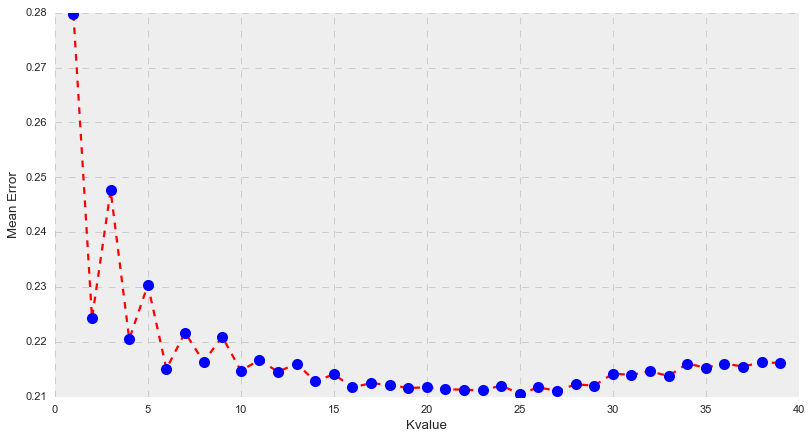

In [63]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('Kvalue')
plt.ylabel('Mean Error')

With different Classifiers for modeling we achieved the following accuracies -

Logistic Regression : 78.97 %

Decision Tree : 81.09 %

Random Forest : 85.32 %

K-Nearest Neighbour : 78.95 %

Therfore, among the above implemented models Random Forest Classifier result is best. 